In [1]:
import SimpleITK as sitk

import numpy as np
import os
from ipywidgets import interact, fixed

import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(precision=4, suppress=True)

In [2]:
data_dir = "E:\\Guided Research\AMOS_examples"
# data_dir = "E:\\Guided Research\AMOS22"
raw_dir = data_dir + "\imagesTr\\"
labels_dir = data_dir + "\labelsTr\\"

target_dir = "E:\\Guided Research\AMOS_preprocessed"
target_raw_dir = target_dir + "\imagesTr\\"
target_labels_dir = target_dir + "\labelsTr\\"
# list(os.listdir(raw_dir))

In [3]:
list(os.listdir(raw_dir))

['amos_0001.nii.gz',
 'amos_0004.nii.gz',
 'amos_0005.nii.gz',
 'amos_0006.nii.gz',
 'amos_0007.nii.gz',
 'amos_0009.nii.gz',
 'amos_0010.nii.gz',
 'amos_0011.nii.gz']

In [4]:
img_list = list(os.listdir(raw_dir))
label_list = list(os.listdir(labels_dir))

In [5]:
print(len(img_list))
print(len(label_list))
# img_list.__len__() == label_list.__len__()


8
8


In [6]:
img1 = sitk.ReadImage(raw_dir+img_list[0])
label1 = sitk.ReadImage(labels_dir+label_list[0])

In [7]:
print(sitk.GetArrayFromImage(img1).shape)
print(sitk.GetArrayFromImage(label1).shape)

(90, 768, 768)
(90, 768, 768)


In [8]:
# from scipy.signal import resample_poly
# from scipy.ndimage import zoom
# from torch.nn.functional import interpolate
# import torch
# def resampling_method(img):
#     voxel_sizes = img.GetSpacing()
#     target_spacing  = (2,2,5)
#     inverse_ratios = (target_spacing[0]/voxel_sizes[0],target_spacing[1]/voxel_sizes[1],target_spacing[2]/voxel_sizes[2])
#     print(inverse_ratios)
    
#     img_array = sitk.GetArrayFromImage(img)
#     img_array = np.expand_dims(img_array,axis=(0,1))
#     # print(img_array.shape)
#     img_array = torch.tensor(img_array)
#     print(img_array.shape)
#     resized_img_array = interpolate(img_array,scale_factor=inverse_ratios).squeeze()
#     resized_img = sitk.GetImageFromArray(resized_img_array).CopyInformation(img)
#     resized_img.SetSpacing((2,2,5))
#     print(inverse_ratios)
#     print(resized_img.GetSpacing())
#     return resized_img

In [15]:
def resampling_method(volume, new_spacing, interpolator=sitk.sitkLinear, default_value=0):
    """
    It resamples the original volume to have the voxel size equal to the desired one.
    Parameters
    ----------
    volume: sitk image 
        The original volume
    new_spacing: numpy.array of float (i.e. [1.15, 1.30, 0.75])
        The desired voxel size
    Returns
    ----------
    sitk image
        The input volume resampled with the desired voxel size
    """
    original_size = volume.GetSize()
    original_spacing = volume.GetSpacing()
    new_size = [int((original_size[0] - 1) * original_spacing[0] / new_spacing[0]), 
                    int((original_size[1] - 1) * original_spacing[1] / new_spacing[1]), 
                            int((original_size[2] - 1) * original_spacing[2] / new_spacing[2])]
    # print(new_size)
    new_volume = sitk.Resample(volume, new_size, sitk.Transform(), interpolator, volume.GetOrigin(),
                                new_spacing, volume.GetDirection(), default_value, volume.GetPixelID())
    return new_volume

In [16]:
resampled_img1 = resampling_method(img1,(2,2,5))

In [17]:
def print_header(img):
    selected_image = img
    print('Before modification:')
    print('origin: ' + str(selected_image.GetOrigin()))
    print('size: ' + str(selected_image.GetSize()))
    print('spacing: ' + str(selected_image.GetSpacing()))
    print('direction: ' + str(selected_image.GetDirection()))
    print('pixel type: ' + str(selected_image.GetPixelIDTypeAsString()))
    print('number of pixel components: ' + str(selected_image.GetNumberOfComponentsPerPixel()))

    # selected_image.SetOrigin((78.0, 76.0, 77.0))
    # selected_image.SetSpacing([0.5,0.5,3.0])

    # print('\nAfter modification:')
    # print('origin: ' + str(selected_image.GetOrigin()))
    # print('spacing: ' + str(selected_image.GetSpacing()))

In [18]:
print_header(img1)

Before modification:
origin: (-233.0, 373.4296875, 26.5)
size: (768, 768, 90)
spacing: (1.0, 1.0, 5.0)
direction: (1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 1.0)
pixel type: 32-bit float
number of pixel components: 1


In [19]:
print_header(resampled_img1)

Before modification:
origin: (-233.0, 373.4296875, 26.5)
size: (383, 383, 89)
spacing: (2.0, 2.0, 5.0)
direction: (1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 1.0)
pixel type: 32-bit float
number of pixel components: 1


In [20]:
print_header(label1)

Before modification:
origin: (-233.0, 373.4296875, 26.5)
size: (768, 768, 90)
spacing: (0.5703125, 0.5703125, 5.0)
direction: (1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 1.0)
pixel type: 16-bit unsigned integer
number of pixel components: 1


In [22]:
resampled_label = resampling_method(label1,(2,2,5))
print_header(resampled_label)

Before modification:
origin: (-233.0, 373.4296875, 26.5)
size: (218, 218, 89)
spacing: (2.0, 2.0, 5.0)
direction: (1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 1.0)
pixel type: 16-bit unsigned integer
number of pixel components: 1


In [6]:
nib.is_proxy(img.dataobj)

True

In [7]:
img_data = img.get_fdata()

In [8]:
unique,counts = np.unique(img_data,return_counts=True)

In [9]:
unique,counts

(array([0., 1., 3., 4., 5.]),
 array([27758042,  2865131,  1814305,   421663,   957435], dtype=int64))

In [10]:
np.isclose(img_data,2.0).sum()

0

In [11]:
new_data = np.isclose(img_data,2.0)

In [12]:
new_img = nib.Nifti1Image(new_data,img.affine,img.header)

In [13]:
nib.save(new_img,'img_smth.nii.gz')

In [14]:
img_dup = nib.load('../sample_img/labels-021.nii.gz')
img_dup2 = nib.load('img_smth.nii.gz')

In [15]:
img_dup2.get_fdata().dtype

dtype('float64')

In [16]:
np.allclose(img_dup.get_fdata(),img_dup2.get_fdata())

False

In [2]:
import pandas as pd

In [6]:
shapes = pd.read_csv('E:\\Guided Research\\AMOS_preprocessed\\resizing_logs.csv')['resized_shape']

In [33]:
shapes_df = pd.DataFrame(shapes.apply(lambda x: np.array(x.split(';'))).to_list(),columns=['x','y','z'])

C:\Users\User\AppData\Local\Temp\ipykernel_15724\105033787.py:1: FutureWarning: Could not cast to int32, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised.
  shapes_df = pd.DataFrame(shapes.apply(lambda x: np.array(x.split(';'))).to_list(),columns=['x','y','z'],dtype=np.int32)


In [36]:
shapes_df = shapes_df.astype(np.int32)

In [37]:
shapes_df.describe()

,x,y,z
count,240.000000,240.000000,240.000000
mean,203.091667,191.795833,91.929167
std,25.190486,40.857185,22.990793
min,139.000000,59.000000,35.000000
25%,189.000000,171.000000,81.750000
50%,199.000000,199.000000,90.000000
75%,218.250000,218.000000,105.000000
max,272.000000,272.000000,139.000000


<AxesSubplot:>

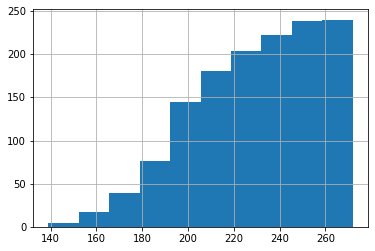

In [38]:
shapes_df.x.hist(cumulative=True)

In [ ]:
import json
dir = "E://Guided Research/AMOS22/"
filename = "task1_dataset.json"
json_obj = json.load(open(dir+filename,'r'))

In [58]:
import csv
import numpy as np
import os
import SimpleITK as sitk
import matplotlib.pyplot as plt
np.set_printoptions(precision=4, suppress=True)

# label_dir = '/data/dan_blanaru/preprocessed_data/CTORG/labelsTr'
# label_dir = '../sample_img/'
# label_dir = '\\\\nas-vab.ifl/polyaxon/data1/dan_blanaru/preprocessed_data/CTORG/labelsTr/' #running on local machine

# csv_path = "..\sample_img\label_profile.csv"
# file = open(csv_path,'w')
# file.write('filename,nr_bladder_vox\n')

def resampling_method(volume, new_spacing, interpolator=sitk.sitkLinear, default_value=0):
    """
    It resamples the original volume to have the voxel size equal to the desired one.
    Parameters
    ----------
    volume: sitk image 
        The original volume
    new_spacing: numpy.array of float (i.e. [1.15, 1.30, 0.75])
        The desired voxel size
    Returns
    ----------
    sitk image
        The input volume resampled with the desired voxel size
    """
    original_size = volume.GetSize()
    original_spacing = volume.GetSpacing()
    new_size = [int((original_size[0] - 1) * original_spacing[0] / new_spacing[0]), 
                    int((original_size[1] - 1) * original_spacing[1] / new_spacing[1]), 
                            int((original_size[2] - 1) * original_spacing[2] / new_spacing[2])]
    # print(new_size)
    new_volume = sitk.Resample(volume, new_size, sitk.Transform(), interpolator, volume.GetOrigin(),
                                new_spacing, volume.GetDirection(), default_value, volume.GetPixelID())
    return new_volume

def crop_and_pad(img,target_shape):
    pass

def create_bladder_voxels(label_img,bladder_indicator=14):
    
    # label_img = sitk.ReadImage(label_path)
    label_array = sitk.GetArrayFromImage(label_img)

    bladder_voxels = np.isclose(label_array,bladder_indicator)*1.0

    bladder_voxels_img = sitk.GetImageFromArray(bladder_voxels)
    bladder_voxels_img.SetSpacing(label_img.GetSpacing())
    bladder_voxels_img.SetOrigin(label_img.GetOrigin())
    bladder_voxels_img.SetDirection(label_img.GetDirection())
    return bladder_voxels_img

def crop_and_pad(label_img,new_shape):
    ...


raw_dir = "E:\\Guided Research\AMOS22"
raw_tr = raw_dir + "\imagesTr\\"
raw_label = raw_dir + "\labelsTr\\"

list_filenames = os.listdir(raw_tr)
create_log = False
if create_log:
    csv_path = 'E:\\Guided Research\\AMOS_preprocessed\\resizing_logs_sample.csv'
    csv_file = open(csv_path,'w')
    original_header = "nr_voxels_original,bladder_voxels_original,bladder_voxels_ratio_original,original_shape"
    resized_header = "nr_voxels_resized,bladder_voxels_resized,bladder_voxels_ratio_resized,resized_shape"
    csv_file.write(f"filename,{original_header},{resized_header}\n")
    print(os.path.exists(csv_path))

resampled_size_list=[]
for filename in list_filenames:
    img_original = sitk.ReadImage(raw_tr+filename)
    label_original = sitk.ReadImage(raw_label+filename)
    
    bladder_label_original = create_bladder_voxels(label_original)
    



    target_spacing = (2,2,5)
    target_shape = (270,)
    img_resized = resampling_method(img_original,target_spacing)
    bladder_label_resized = resampling_method(bladder_label_original,target_spacing,interpolator=sitk.sitkNearestNeighbor)



    # print(img_original.GetSpacing())
    print(filename)
    print(bladder_label_resized.GetSpacing())
    print(bladder_label_resized.GetSize())
    resampled_size_list.append(list(bladder_label_resized.GetSize()))

    if create_log:
        csv_file.write(filename+',')
    
        nr_voxels_original = np.prod(bladder_label_original.GetSize())
        nr_bladder_voxels_original = sitk.GetArrayFromImage(bladder_label_original).sum()
        bladder_ratio_original = nr_bladder_voxels_original/nr_voxels_original

        csv_file.write(f"{nr_voxels_original},")
        csv_file.write(f"{nr_bladder_voxels_original},")
        csv_file.write(f"{100*bladder_ratio_original},")
        original_shape = bladder_label_original.GetSize()
        csv_file.write(f"{original_shape[0]};{original_shape[1]};{original_shape[2]},")

        nr_voxels_resized = np.prod(bladder_label_resized.GetSize())
        nr_bladder_voxels_resized = sitk.GetArrayFromImage(bladder_label_resized).sum()
        bladder_ratio_resized = nr_bladder_voxels_resized/nr_voxels_resized

        csv_file.write(f"{nr_voxels_resized},")
        csv_file.write(f"{nr_bladder_voxels_resized},")
        csv_file.write(f"{100*bladder_ratio_resized},")
        resized_shape = bladder_label_resized.GetSize()
        csv_file.write(f"{resized_shape[0]};{resized_shape[1]};{resized_shape[2]},")
        csv_file.write("\n")
    


    
print()
print(np.min(np.array(resampled_size_list),axis=0))
    

#todo:
# load img and label side by side

# count bladder pix in img
# resize img
# resize label
# count bladder pix in label
# if it's working, clean chrome tabs

# crop img
# crop label
# count bladder pix in label










# label_list = os.listdir(label_dir)
# total_bladderless = 0
# total_included = 0
# for filename in label_list: 
#     if filename[:7] != "labels-":
#         continue
#     img = nib.load(os.path.join(label_dir,filename))
#     img_data = img.get_fdata()

#     bladder_indicator = 2.0
#     new_data = np.isclose(img_data,bladder_indicator)
#     nr_bladder_vox = new_data.sum()
    
#     print(os.path.join(label_dir,filename), nr_bladder_vox)
#     # file.write(f"{filename},{nr_bladder_vox}\n")
#     print(f"{filename},{nr_bladder_vox}")
#     if nr_bladder_vox == 0:
#         total_bladderless = total_bladderless+1
#     else:
#         total_included = total_included + 1

#     new_img = nib.Nifti1Image(new_data,img.affine,img.header)
#     new_path = os.path.join(label_dir,('bladder'+filename))
#     if nr_bladder_vox !=0:
#         nib.save(new_img,new_path)
# # file.write(f'total,{total_bladderless}')
# # file.close()
# print("total bladderless: ", total_bladderless)
# print("total_included", total_included)

amos_0001.nii.gz
(2.0, 2.0, 5.0)
(218, 218, 89)
amos_0004.nii.gz
(2.0, 2.0, 5.0)
(199, 199, 77)
amos_0005.nii.gz
(2.0, 2.0, 5.0)
(218, 218, 79)


KeyboardInterrupt: 

In [59]:
list(np.unique(sitk.GetArrayFromImage(bladder_label_resized).flatten(),return_counts=True)[0])

[0.0, 1.0]

(6079446,)